In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [2]:
# load package for loading data
import pandas as pd

In [4]:
housing_dataset = pd.read_csv('boston_housing.csv')
housing_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [5]:
X = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [6]:
# load package for spliting data
import sklearn
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Data Visualization

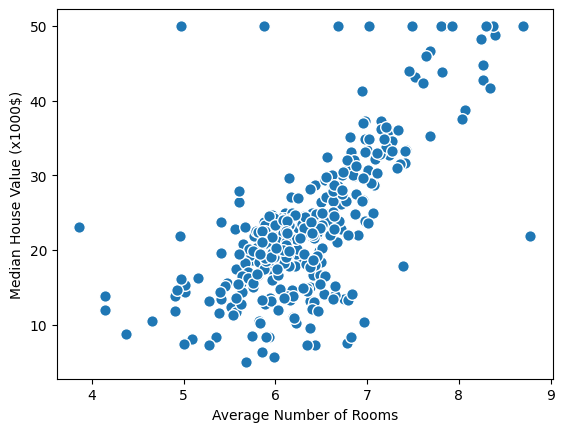

In [8]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.show()

### Linear Regression (Base)

In [9]:
def makePredictions(w: np.array, b: np.array, X: np.array) -> np.array: ### ???
  """
  - This is a function that predict output-variable for input-array of X
  - inputs:
    - w: np.array-(n_features)
    - b: np.array-(1)
    - X: np.array-(n_samples, n_features)
  - return:
    - y: np.array, shape (n_samples)
  """
  return np.sum(X * w + b, axis = 1)

### Gradient Descent

In [10]:
# main source code for all
class LinearRegressionScratch: ### ***
  """
  This is class of Linear Regression Model
  inputs:
  - n_features: number of features of input-variables
  - random_state: establish consistency in all execute the program
  - learning_rate: learning rate of Gradient Descent Algorithm
  - n_epochs: number of iterations over all samples
  - batch_size: number of samples in each batch
  - pow_strength: doubling the examples
  """
  def __init__(self, n_features: int, random_state: int= 42, learning_rate: np.array= 1e-3, n_epochs: int= 200, batch_size: float= -1, pow_strength: int= 0) -> None:
    self.random_state = random_state
    np.random.seed(self.random_state)
    self.n_features = n_features

    # init w randomly with n+1 features
    self.w = np.random.rand(self.n_features + 1)

    # set learning HP
    self.learning_rate = learning_rate
    self.n_epochs = n_epochs
    self.batch_size = batch_size
    self.pow_strength = pow_strength

    # costs and params
    self.costs = []
    self.inlearn_params = []


  def expandInputVariables(self, __X: np.array):
    """
    This is method that expand shape of X to (len(X), n_features + 1)
    inputs:
      - X: samples, type: np.array, constant
    """
    # change X
    X = __X.copy()
    if(X.shape[1] != self.n_features + 1):
      o = np.ones((len(X), 1))
      return np.concatenate((o, X), axis = 1)
    return X


  def predict(self, __X: np.array) -> np.array:
    """
    This is method that predict the outputs for samples X
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
    return:
      - predictions for X, type: np.array-(len(X))
    """
    # change X
    X = __X.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    X = self.expandInputVariables(X)
    return np.sum(X * self.w, axis = 1)


  def compute_gradient(self, __X: np.array, __y: np.array) -> np.array:
    """
    This is method that compute gradient for w
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    # shape X
    if(len(X.shape) < 2):
      X.reshape(1, -1)
    y_pred = self.predict(X)
    return 2 * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)


  def compute_cost(self, __X: np.array, __y: np.array, index: int = -1) -> np.array:
    """
    This is method that compute cost for w with dataset = (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features+1), constant
      - y: output-variable, type: np.array-(len(X))
    return:
      - cost of w, type: np.array-(1)
    """
    # change X, y
    X, y = __X.copy(), __y.copy()
    X = self.expandInputVariables(X)
    y_pred = self.predict(X)
    return np.mean((y_pred - y)**2)

  def initParam(self, X, y):
    self.w = np.zeros(self.n_features + 1)
    self.w[0] = np.mean(y) ### *** ensure that R2 >= 0
    for i in range(1, X.shape[1]):
      x = X[:, i].reshape(len(X))
      if(self.n_features == 1):
        self.w[i] = np.sum((y - np.mean(y))*(x - np.mean(x))) / np.sum((x - np.mean(x))**2)
      else:
        self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate

  def fit(self, __X: np.array, __y: np.array) -> None:
    """
    This is a method that learn from dataset (X, y)
    inputs:
      - X: samples, type: np.array-(len(X), n_features + 1), constant
      - y: output-variable, type: np.array-(len(X)), constant
    outcome:
      - model was fited
    """
    np.random.seed(self.random_state)
    # change X, y
    X, y = __X.copy(), __y.copy()
    ### randomly permutation
    ## X = np.random.permutation(X)
    X = self.expandInputVariables(X)
    for k in range(self.pow_strength):
      X = np.concatenate((X, X))
      y = np.concatenate((y, y))

    # init w0
    self.initParam(X, y)
    print("---------------------------------------")
    print('"LINEAR SCRATCH MODEL"')
    print('"W0" for learning is: ', self.w)
    print('"LEARNING RATE" is: ', self.learning_rate)

    # batch size
    if(self.batch_size <= 0):
      self.batch_size = int(len(X) * -self.batch_size)

    self.costs = []
    self.inlearn_params = []
    for i_epochs in range(self.n_epochs):
      # stochastic
      for i in range(0, len(X), self.batch_size):
        if(i_epochs == 0 and (i > 0.99 * len(X) or i < 0.01 * len(X))):
          print("learning at epoch = 0, i = ", i)
        # compute velocity
        velocity = self.compute_gradient(X[i: i+self.batch_size], y[i: i+self.batch_size])
        # update w'
        self.w -= self.learning_rate * velocity
      # compute loss at w
      self.costs += [self.compute_cost(X, y)]
      self.inlearn_params += [self.w]

    # pick param that have min cost
    self.w = self.inlearn_params[np.argmin(self.costs)]

- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.01
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


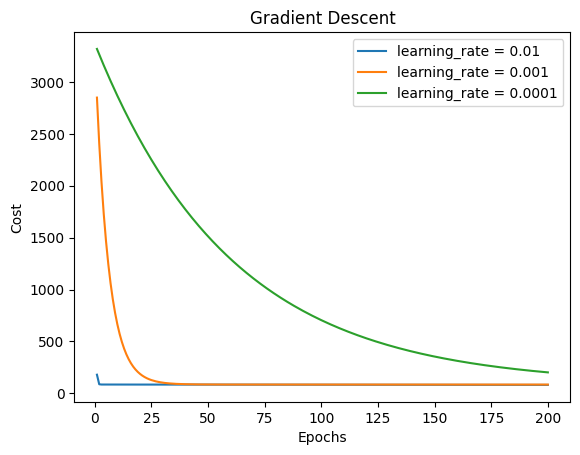

In [11]:
for learning_rate in [1e-2, 1e-3, 1e-4]:
  # Initialize the model
  reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= learning_rate, n_epochs= 200, batch_size= -1, pow_strength= 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

The suitable 'learning rate' value is 1e-2, because it is the largest and converges

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.01
learning at epoch = 0, i =  0


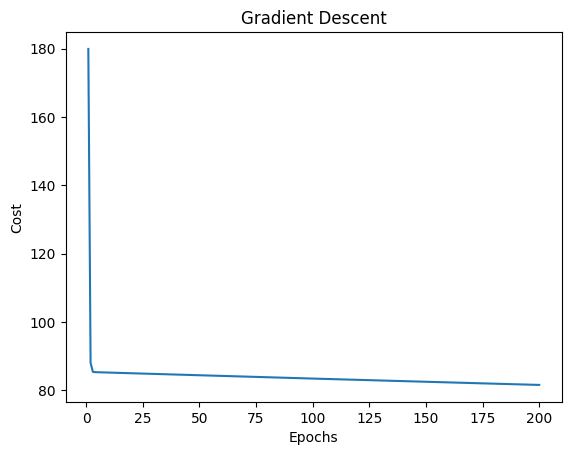

In [12]:
# Initialize the model
reg_GD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                learning_rate= 1e-2, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

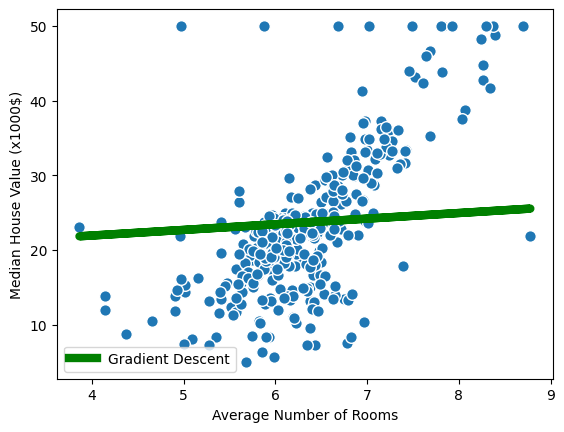

In [13]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [ ]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [14]:
# Initialize the model
reg_SGD = LinearRegressionScratch(n_features= X_train.shape[1], random_state= 42,
                                  learning_rate= 1e-4, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train model
reg_SGD.fit(X_train, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  9.1181022 ]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data

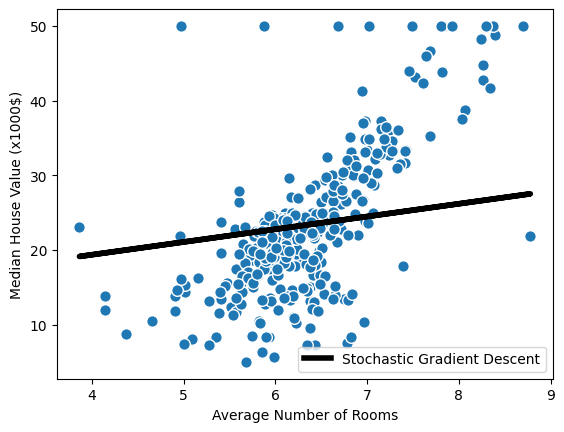

In [15]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

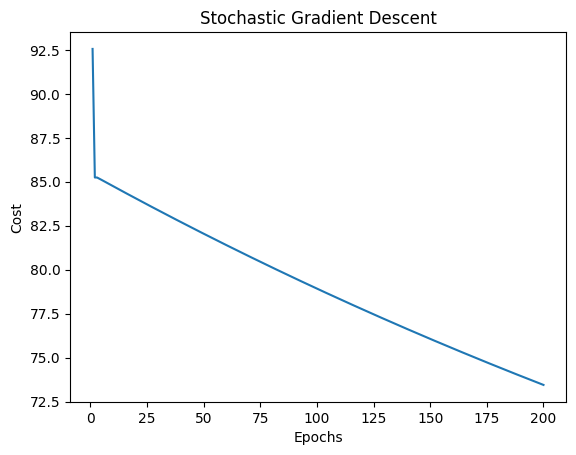

In [16]:
# Visualize the cost trend ### ***
plt.plot(range(1, len(reg_SGD.costs) + 1), reg_SGD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent')
plt.show()

### Normal Equation (sklearn)

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

Visualize the prediction of Normal Equation model on Training Data

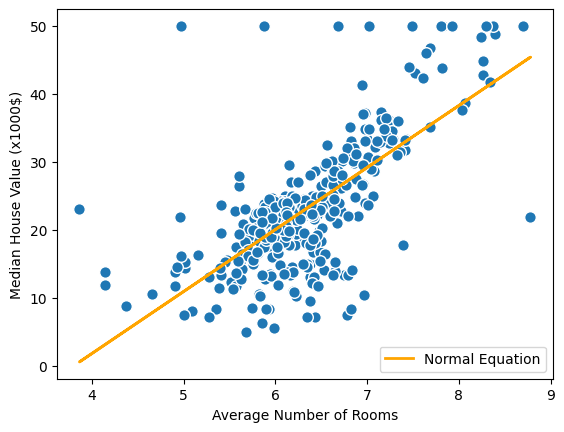

In [19]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

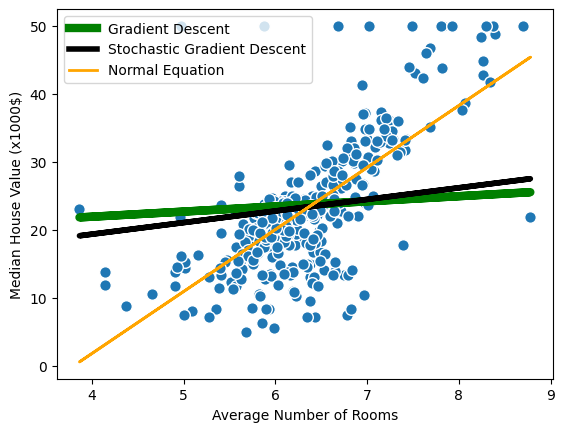

In [20]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [22]:
w_GD = reg_GD.w
w_SGD = reg_SGD.w
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
print(w_GD)
print(w_SGD)
print(w_NE)

[18.91336402  0.75376432]
[12.5347117   1.70578624]
[-34.66230744   9.1181022 ]


Performance Comparisons (on Testing Set)

In [23]:
y_pred_GD = reg_GD.predict(X_test)

In [24]:

y_pred_SGD = reg_SGD.predict(X_test)

In [25]:

y_pred_NE = reg_NE.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [27]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.512052
MAE of SGD: 6.01941
MAE of NE: 4.314224


In [28]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 73.704859
MSE of SGD: 65.549636
MSE of NE: 40.35145


In [29]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.010847
R2 of SGD: 0.120294
R2 of NE: 0.458465


## Experiment with Standardized Data

In [30]:
# Re-load the dataset
housing_dataset = housing_dataset = pd.read_csv("boston_housing.csv")

In [31]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler

In [32]:
# Standardize the 'RM' column
scaler = StandardScaler()
housing_dataset[['RM']] = scaler.fit_transform(housing_dataset[['RM']])

In [33]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = housing_dataset.loc[:, ['RM']].to_numpy()
y = housing_dataset.loc[:, 'MEDV'].to_numpy()

In [34]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size= 0.3, random_state = 42)

### Gradient Descent

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


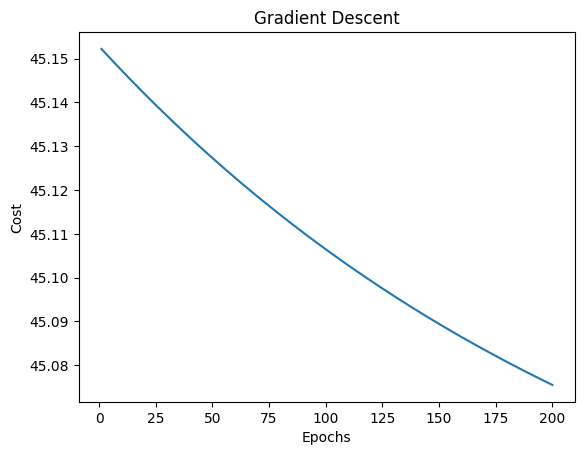

In [35]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= -1, pow_strength= 0)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data



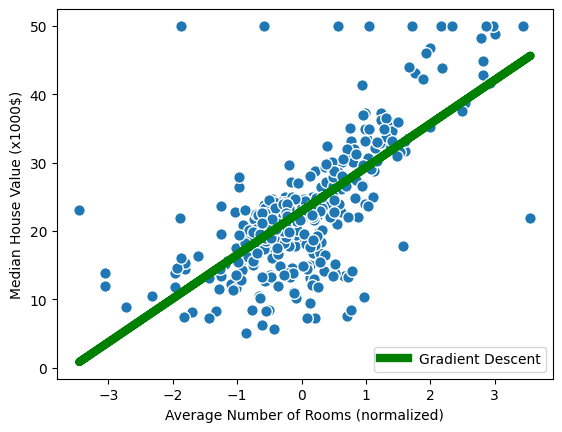

In [36]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [37]:

# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = LinearRegressionScratch(n_features= X_train_norm.shape[1], random_state= 42,
                                 learning_rate= 1e-3, n_epochs= 200, batch_size= 1, pow_strength= 0)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [23.01581921  6.40020122]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


Visualize the prediction of Stochastic Gradient Descent model on Training Data


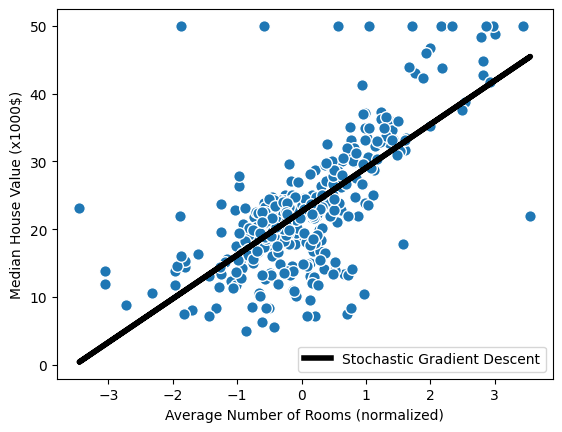

In [38]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [39]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

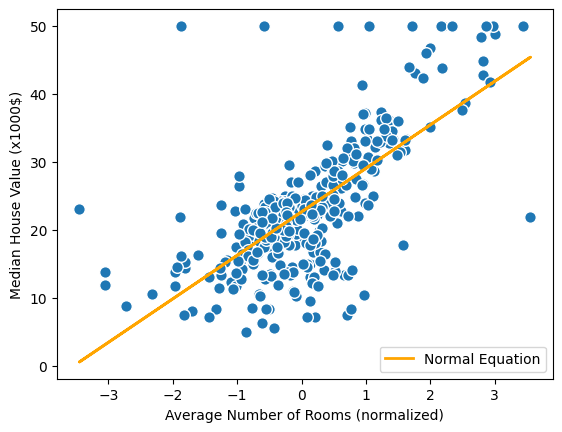

In [40]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

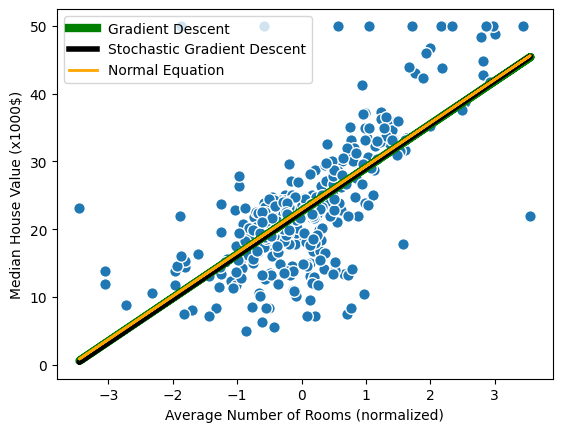

In [41]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [42]:
w_GD = reg_GD.w
w_GD

array([22.89242451,  6.39438404])

In [43]:
w_SGD = reg_SGD.w
w_SGD

array([22.59905782,  6.43502429])

In [45]:
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([22.64163118,  6.40020122])

In [46]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [47]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [48]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [49]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.339058
MAE of SGD: 4.309515
MAE of NE: 4.314224


In [50]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.59605
MSE of SGD: 40.326493
MSE of NE: 40.35145


In [51]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.455182
R2 of SGD: 0.4588
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [52]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [53]:
X = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [54]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-06 0.00000000e+00 5.00296668e-05
 0.00000000e+00 3.18023945e-04 2.81108806e-04 1.94029505e-05
 1.38075089e-04 4.87734211e-05 2.11474700e-04 3.17321217e-04
 4.09509320e-07 6.41123109e-05]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate
C:\Users\Thinkpad\anaconda3\Lib\site-packages\numpy\core\_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:89: RuntimeWarning: overflow encountered in square
  return np.mean((y_pred - y)**2)
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:60: RuntimeWarning: invalid value encountered in multiply
  return np.sum(X * self.w, axis = 1)
C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:73: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.mean(X * (y_pred - y).reshape((-1, 1)), axis = 0)


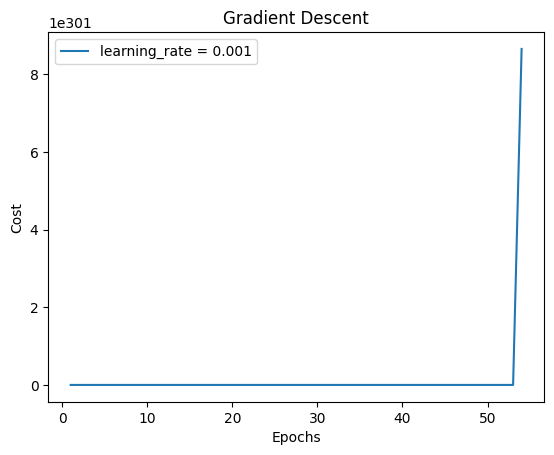

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:141: RuntimeWarning: invalid value encountered in subtract
  self.w -= self.learning_rate * velocity


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-07 0.00000000e+00 5.00296668e-06
 0.00000000e+00 3.18023945e-05 2.81108806e-05 1.94029505e-06
 1.38075089e-05 4.87734211e-06 2.11474700e-05 3.17321217e-05
 4.09509320e-08 6.41123109e-06]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0


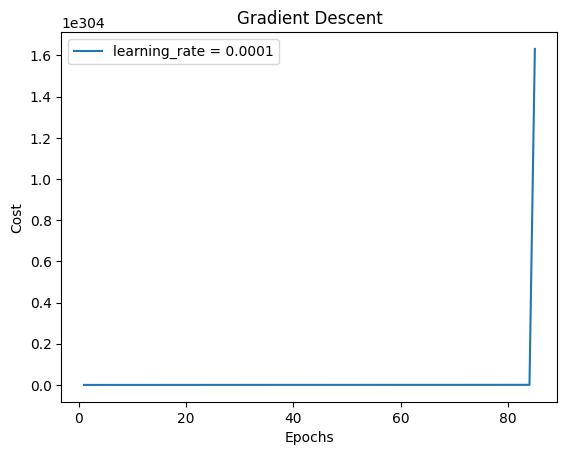

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-08 0.00000000e+00 5.00296668e-07
 0.00000000e+00 3.18023945e-06 2.81108806e-06 1.94029505e-07
 1.38075089e-06 4.87734211e-07 2.11474700e-06 3.17321217e-06
 4.09509320e-09 6.41123109e-07]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0


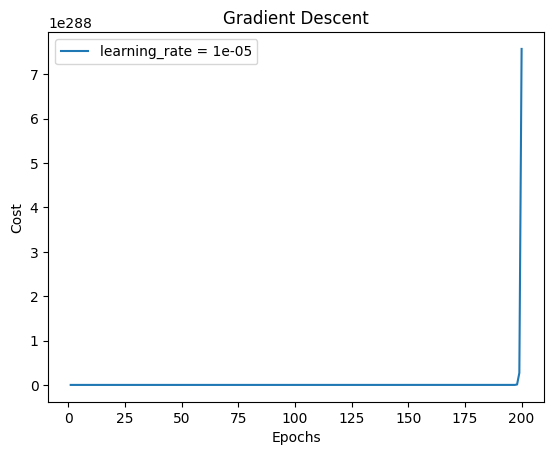

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0


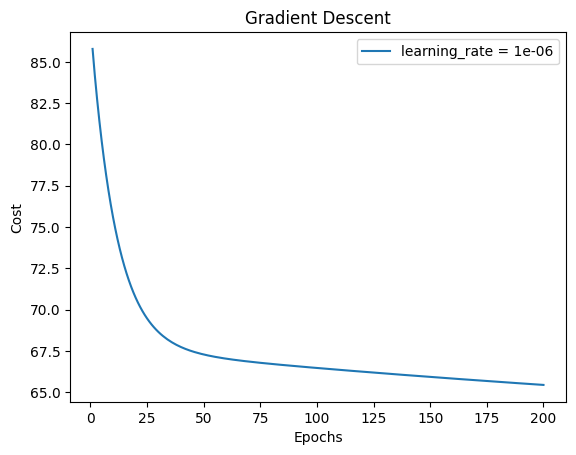

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-10 0.00000000e+00 5.00296668e-09
 0.00000000e+00 3.18023945e-08 2.81108806e-08 1.94029505e-09
 1.38075089e-08 4.87734211e-09 2.11474700e-08 3.17321217e-08
 4.09509320e-11 6.41123109e-09]
"LEARNING RATE" is:  1e-07
learning at epoch = 0, i =  0


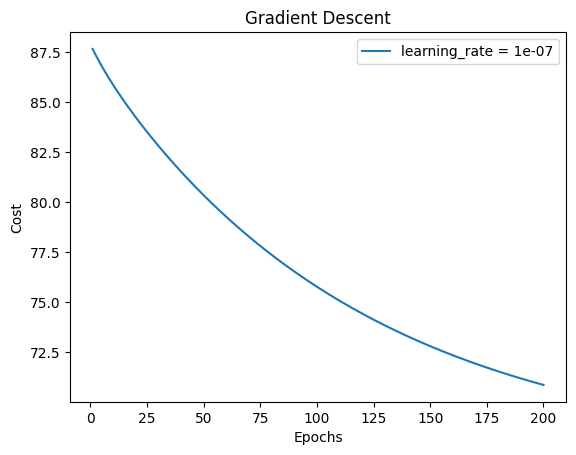

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-11 0.00000000e+00 5.00296668e-10
 0.00000000e+00 3.18023945e-09 2.81108806e-09 1.94029505e-10
 1.38075089e-09 4.87734211e-10 2.11474700e-09 3.17321217e-09
 4.09509320e-12 6.41123109e-10]
"LEARNING RATE" is:  1e-08
learning at epoch = 0, i =  0


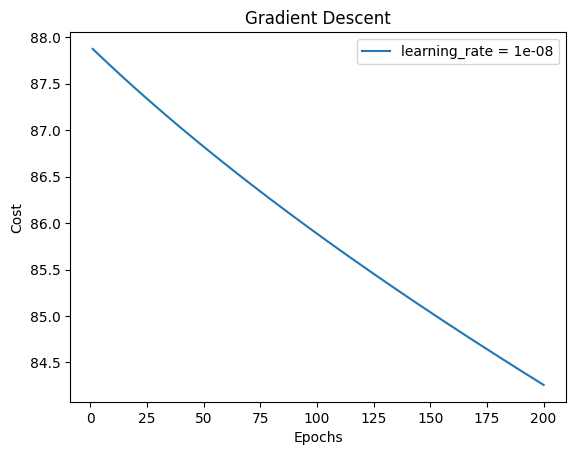

In [65]:
for learning_rate in [1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model
  reg_GD.fit(X_train, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.title('Gradient Descent')
  plt.legend()
  plt.show()

the suitable learning_rate is 1e-6, because it converges the best

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


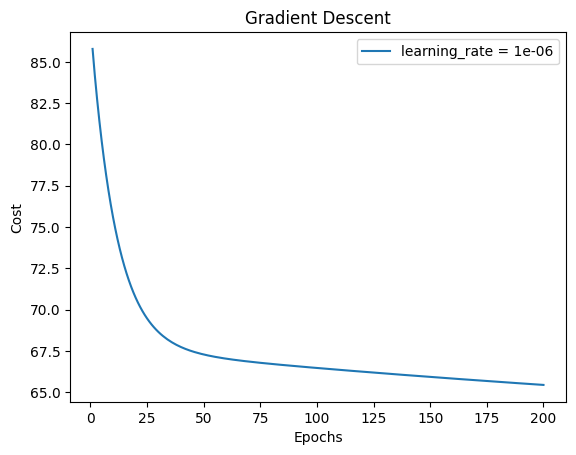

In [66]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-6, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {1e-6}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [81]:
# Initialize the SGD model
reg_SGD = LinearRegressionScratch(n_features = X_train.shape[1], random_state= 42,
                                learning_rate = 1e-6, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train, y_train)

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_1708\1139608244.py:99: RuntimeWarning: divide by zero encountered in double_scalars
  self.w[i] = (np.mean(y)/np.mean(x)) / (np.max(y)/np.min(x)) * self.learning_rate


---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [2.30158192e+01 1.20190271e-09 0.00000000e+00 5.00296668e-08
 0.00000000e+00 3.18023945e-07 2.81108806e-07 1.94029505e-08
 1.38075089e-07 4.87734211e-08 2.11474700e-07 3.17321217e-07
 4.09509320e-10 6.41123109e-08]
"LEARNING RATE" is:  1e-06
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


### Normal Equation

In [ ]:
# Add the '1' column to data


In [75]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

LinearRegression()

### Algorithms Comparisons

In [76]:
w_GD = reg_GD.w
w_GD

array([ 2.30158707e+01, -4.10889395e-03,  1.52877868e-02, -3.67339939e-03,
        2.17619609e-04, -2.44984617e-05,  1.87215806e-03, -1.00585621e-02,
        2.43617937e-04, -2.68314762e-04, -1.79545015e-02, -1.66616524e-03,
        2.22267036e-02, -1.28981518e-02])

In [82]:
w_SGD = reg_SGD.w
w_SGD

array([ 2.30345291e+01, -9.93199434e-02,  5.80501003e-02, -3.38520364e-02,
        5.44765817e-02,  1.11573957e-02,  3.89478406e-01,  7.67667724e-02,
       -2.34792513e-01,  1.31137420e-01,  1.93305325e-03, -2.35128247e-01,
        1.60045102e-02, -8.53263944e-01])

In [78]:
w_NE = np.concatenate((np.array([reg_NE.intercept_]),reg_NE.coef_), axis = 0)
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [83]:
y_pred_GD = reg_GD.predict(X_test)

In [84]:
y_pred_SGD = reg_SGD.predict(X_test)

In [85]:
y_pred_NE = reg_NE.predict(X_test)

In [86]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 5.528594
MAE of SGD: 4.277363
MAE of NE: 3.16271


In [87]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 53.883901
MSE of SGD: 33.228642
MSE of NE: 21.517444


In [88]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.276853
R2 of SGD: 0.554056
R2 of NE: 0.711226


## Experiment with Standardized Data

In [89]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

In [90]:
# Get the columns' names
name_columns = housing_dataset.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [91]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
housing_dataset[name_columns[:-1]] = scaler.fit_transform(housing_dataset[name_columns[:-1]])

X_new <- 13 independent variables

y <- 'MEDV' column

In [92]:
X_new = housing_dataset.iloc[:, :-1].to_numpy()
y = housing_dataset.iloc[:, -1].to_numpy()

In [93]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state = 42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-02 -1.29738854e-01  1.22577612e+00
 -7.44558747e-03 -3.04623293e-02 -2.71631150e-02 -1.34470807e-01
  4.20638538e-02  3.52782680e-02  8.52365948e-02  1.51795690e-02
 -5.41769218e-02  2.16789268e-02]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-04 -1.29738854e-03  1.22577612e-02
 -7.44558747e-05 -3.04623293e-04 -2.71631150e-04 -1.34470807e-03
  4.20638538e-04  3.52782680e-04  8.52365948e-04  1.51795690e-04
 -5.41769218e-04  2.16789268e-04]
"LEARNING RATE" is:  1e-05
learning at epoch = 0, i =  0
---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.5236

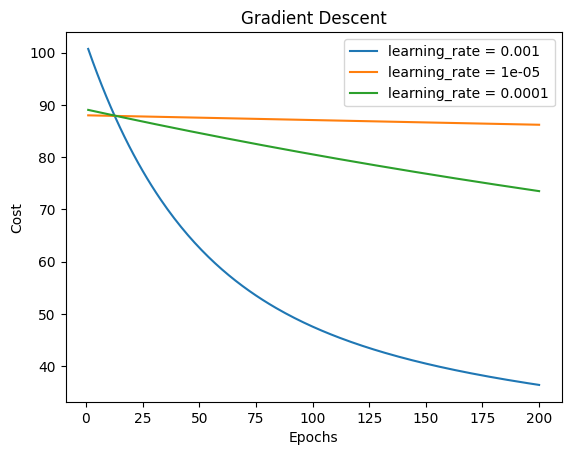

In [94]:
for learning_rate in [1e-3, 1e-5, 1e-4]:
  # Initalize the GD model
  reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                  learning_rate = learning_rate, n_epochs = 200, batch_size = -1, pow_strength = 0)

  # Train model on normalized data
  reg_GD.fit(X_train_norm, y_train)

  # Visualize the cost trend
  plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs, label = f'learning_rate = {learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.legend()
plt.show()

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-02 -1.29738854e-01  1.22577612e+00
 -7.44558747e-03 -3.04623293e-02 -2.71631150e-02 -1.34470807e-01
  4.20638538e-02  3.52782680e-02  8.52365948e-02  1.51795690e-02
 -5.41769218e-02  2.16789268e-02]
"LEARNING RATE" is:  0.001
learning at epoch = 0, i =  0


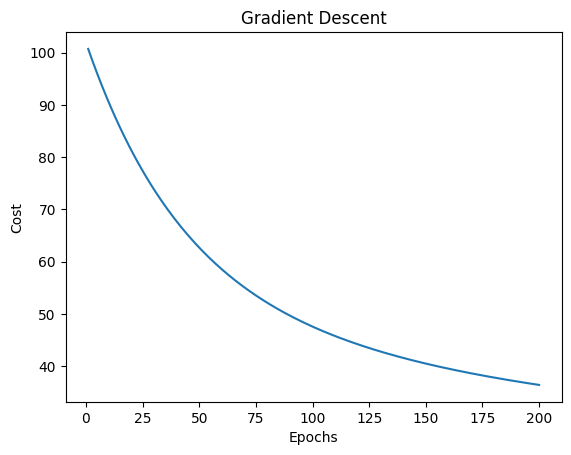

In [95]:
# Initalize the GD model
reg_GD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 1e-3, n_epochs = 200, batch_size = -1, pow_strength = 0)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [96]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = LinearRegressionScratch(n_features = X_train_norm.shape[1], random_state= 42,
                                learning_rate = 1e-4, n_epochs = 200, batch_size = 1, pow_strength = 0)

# Train model
reg_SGD.fit(X_train_norm, y_train)

---------------------------------------
"LINEAR SCRATCH MODEL"
"W0" for learning is:  [ 2.30158192e+01  1.15513216e-03 -1.29738854e-02  1.22577612e-01
 -7.44558747e-04 -3.04623293e-03 -2.71631150e-03 -1.34470807e-02
  4.20638538e-03  3.52782680e-03  8.52365948e-03  1.51795690e-03
 -5.41769218e-03  2.16789268e-03]
"LEARNING RATE" is:  0.0001
learning at epoch = 0, i =  0
learning at epoch = 0, i =  1
learning at epoch = 0, i =  2
learning at epoch = 0, i =  3
learning at epoch = 0, i =  351
learning at epoch = 0, i =  352
learning at epoch = 0, i =  353


### Normal Equation (sklearn)

In [97]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

LinearRegression()

### Algorithms Comparisons

In [98]:
w_GD = reg_GD.w
w_GD

array([22.96146685, -0.60016239,  0.35747711,  0.38333417,  0.61969006,
       -0.6405002 ,  1.70609093, -0.58452759,  0.13588291, -0.45835163,
       -0.61758932, -1.0635625 ,  0.54229879, -1.62595181])

In [100]:
w_SGD = reg_SGD.w
w_SGD

array([22.50088697, -1.04754809,  0.64943174,  0.08412812,  0.8425799 ,
       -1.54404266,  2.92182127, -0.35333686, -2.7228398 ,  1.36823026,
       -0.69940161, -1.91498747,  1.06939156, -3.88686454])

In [101]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [102]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [103]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [104]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [105]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.153957
MAE of SGD: 3.186631
MAE of NE: 3.16271


In [106]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 32.717402
MSE of SGD: 22.100764
MSE of NE: 21.517444


In [107]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.560917
R2 of SGD: 0.703398
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

- Hệ số xác định hay $R^2$ là một thông số thống kê biểu thị *tỷ lệ* phương sai - $var$ trong ***biến phụ thuộc*** $y$ có thể được giải thích bằng ***các biến độc lập*** $x_1, x_2,.., x_d$ trong mô hình hồi quy.
- Đây là số liệu đánh giá thường được sử dụng trong bài toán hồi quy *Regression* để đánh giá mức độ phù hợp của một mô hình.ác chỉ số khác để có cái nhìn toàn diện hơn về chất lượng của mô hình.
hỉ số khác để có cái nhìn toàn diện hơn về chất lượng của mô hình.
chỉ số khác để có cái nhìn toàn diện hơn về chất lượng của mô hình.
 chỉ số khác để có cái nhìn toàn diện hơn về chất lượng của mô hình.


$$
R^2 = 1 - \frac{\text{sum squared regression (SSR)}}{\text{total sum of squares (SST)}} 
    = 1 - \frac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y})^2}
$$


## Các thành phần:

- $y_i$: Giá trị thực của biến phụ thuộc (quan sát thực tế).
- $\hat{y}_i$: Giá trị dự đoán của biến phụ thuộc từ mô hình hồi quy.
- $\bar{y}$: Trung bình của tất cả các giá trị thực của biến phụ thuộc $y_i$.
- $\sum (y_i - \hat{y}_i)^2$: **SSR** (Sum of Squared Residuals - tổng bình phương phần dư) là tổng bình phương sai lệch giữa giá trị thực $y_i$ và giá trị dự đoán $\hat{y}_i$. Phần này đo lường mức độ sai số của mô hình.
- $\sum (y_i - \bar{y})^2$: **SST** (Total Sum of Squares - tổng bình phương toàn phần) là tổng bình phương sai lệch giữa giá trị thực $y_i$ và giá trị trung bình $\bar{y}$. Phần này đo lường tổng biến thiên trong dữ liệu mà không xét đến mô hình.

## Ý nghĩa:

- $R^2$ cho thấy tỷ lệ phần trăm của biến thiên trong dữ liệu được mô hình giải thích. Nó nằm trong khoảng từ 0 đến 1:
  - $R^2 = 1$: Mô hình giải thích hoàn toàn biến thiên trong dữ liệu (tức là giá trị dự đoán khớp hoàn toàn với giá trị thực).
  - $R^2 = 0$: Mô hình không giải thích được biến thiên nào cả (tức là giá trị dự đoán không tốt hơn so với giá trị trung bình).
  - $0 < R^2 < 1$: Mô hình giải thích một phần biến thiên của dữ liệu.

## Diễn giải trực quan:

- **SST** thể hiện tổng biến thiên trong dữ liệu mà không xét mô hình.
- **SSR** thể hiện lượng biến thiên còn lại mà mô hình không thể giải thích.
- Khi **SSR** nhỏ (mô hình phù hợp tốt), thì $R^2$ sẽ gần bằng 1, cho thấy mô hình giải thích được phần lớn biến thiên của dữ liệu. Ngược lại, nếu **SSR** lớn, $R^2$ sẽ gần bằng 0, cho thấy mô hình không hiệu quả trong việc giải thích dữ liệu.



### Vì sao nên dùng $R^2$ ###

- Là một con số biểu thị **tỷ lệ** nên giúp ta dễ dàng thấy được *mức độ phù hợp của mô hình với tập dữ liệu* hơn là sử dụng các giá trị sai số.
- Đánh giá được mức độ phù hợp của mô hình trong việc giải thích *sự biến thiên của biến phụ thuộc* $y$ vào các biến độc lập $x$.
- So sánh được hiệu suất giữa các mô hình hồi quy khác nhau.
- Một cách trực giác, ta có thể hiểu rằng tỷ lệ $R^2$ chính là **tỷ lệ hiệu suất** giữa mô hình dự đoán mà chúng ta đã cho *learning* so với một mô hình không học *non-learning* (luôn dự đoán bằng mean(y)).

- Nhược điểm:
  - Không đánh giá được phân bố sai số (lỗi) của mô hình
  - Xác định mô hình đang bị underfitting hay overfitting không?
  - --> Vì vậy, nên sử dụng kết hợp với các thông số khác chẳng hạn như $MSE$, $MAE$, và biểu đồ đánh giá sai số để có thể đánh giá hiệu suất của mô hình một cách toàn diện nhất.